## Question-1 :What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

In [ ]:
In machine learning algorithms, especially in Support Vector Machines (SVMs), the relationship between polynomial functions and kernel functions lies in the use of kernel trick to handle non-linear relationships in the data.

Kernel Functions:
Kernel functions play a crucial role in SVMs, where they are employed to implicitly map the input data into a higher-dimensional space without explicitly computing the transformation. The kernel function calculates the dot product of the data points in the higher-dimensional space, allowing SVMs to find complex decision boundaries in a computationally efficient manner.

Polynomial Functions as Kernels:
Polynomial functions are often used as kernel functions in SVMs to capture non-linear relationships. The polynomial kernel is defined as:
K(x 
i
​
 ,x 
j
​
 )=(x 
i
​
 ⋅x 
j
​
 +c) 
d
 

Here:
x 
i
​
  and 
x 
j
​
  are input vectors.
c is a constant.
d is the degree of the polynomial.
The polynomial kernel introduces polynomial features to the input space, allowing SVMs to learn decision boundaries that are not linear in the original feature space.

Relationship:
Implicit Feature Mapping: Both polynomial functions and kernel functions involve a type of feature mapping, where the data is transformed into a higher-dimensional space. Polynomial functions explicitly define this mapping, while kernel functions do it implicitly.

Non-Linearity Handling: Polynomial functions introduce non-linearities by considering higher-order terms. Similarly, kernel functions enable SVMs to work in a higher-dimensional space, capturing non-linear relationships in the original feature space.

Computational Efficiency: The kernel trick avoids the explicit computation of the transformed feature space, making it computationally efficient. Polynomial kernels, when used in SVMs, leverage this trick to handle non-linear relationships without the need to explicitly calculate the transformed features.

Flexibility in Model Complexity: Both polynomial kernels and other types of kernels provide flexibility to SVMs in capturing complex decision boundaries. The choice of kernel, including polynomial kernels, allows the model to adapt to different types of relationships in the data.

In summary, polynomial functions can be used as kernel functions in SVMs to handle non-linear relationships by implicitly mapping data into higher-dimensional spaces. The kernel trick is a powerful concept that enables SVMs to efficiently work with non-linear relationships without explicitly calculating the transformed feature space.

## Question-2 :How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Accuracy: 66.67%


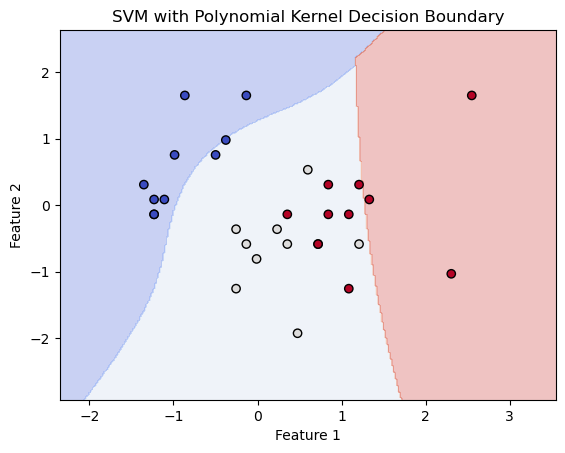

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # Degree is the degree of the polynomial
svm_poly.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = svm_poly.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary for SVM with polynomial kernel
plot_decision_boundary(svm_poly, X_test_scaled, y_test, "SVM with Polynomial Kernel Decision Boundary")

## Question-3 :How does increasing the value of epsilon affect the number of support vectors in SVR?

In [ ]:
In Support Vector Regression (SVR), the parameter epsilon (
ε) is a part of the definition of the margin, and it determines the width of the epsilon-insensitive tube around the predicted function. The epsilon-insensitive tube is a region within which errors are not penalized, and it plays a crucial role in the formulation of the SVR optimization problem.

Increasing the value of epsilon in SVR has an impact on the number of support vectors and, consequently, on the flexibility of the regression model. Here's how it typically affects the SVR model:

Wider Epsilon-Insensitive Tube:

A larger epsilon results in a wider epsilon-insensitive tube around the predicted function.
Points within this tube are not considered errors and do not contribute to the loss function during training.
Fewer Support Vectors:

With a wider tube, fewer data points are treated as support vectors because the model allows for a larger margin of error.
Points within the tube, even if they violate the epsilon-insensitive loss, may not be considered support vectors.
Smoothing Effect:

Increasing epsilon tends to smooth the model's predictions by allowing a larger margin of error.
It can make the model more tolerant to noise in the training data.
Reduced Model Complexity:

A larger epsilon generally leads to a simpler model with fewer support vectors.
The model may generalize better to unseen data but might be less capable of capturing fine details in the training data.
It's essential to choose the appropriate value for epsilon based on the specific characteristics of the data and the desired trade-off between model complexity and accuracy. A larger epsilon may be suitable when the training data has noise or when a more generalized model is preferred. However, it's crucial to validate the model's performance on a separate validation set to avoid overfitting or underfitting.

In summary, increasing the value of epsilon in SVR results in a wider epsilon-insensitive tube, fewer support vectors, and a smoother model with reduced complexity. The choice of epsilon should be based on the characteristics of the data and the desired trade-off between model flexibility and generalization.



## Question-4 : How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

In [ ]:
Support Vector Regression (SVR) is a machine learning algorithm that uses support vector machines for regression tasks. Several parameters influence the performance of SVR, and their choice depends on the characteristics of the data and the desired trade-offs. Let's discuss how the choice of the kernel function, C parameter, epsilon parameter (
�
ε), and gamma parameter affects SVR:

1. Kernel Function:
Purpose: Determines the type of mapping function used to transform the input features.
Choices:
Linear Kernel: Suitable for linear relationships.
Polynomial Kernel: Captures non-linear relationships.
RBF (Radial Basis Function) Kernel: Suitable for complex non-linear relationships.
Example:
Use a linear kernel for linear relationships.
Use a polynomial or RBF kernel for non-linear relationships.
2. C Parameter:
Purpose: Controls the trade-off between smoothness of the model and fitting the training data.
Effect:
Smaller C values lead to a smoother model with a larger margin.
Larger C values allow the model to fit the training data more closely.
Example:
Increase C when the training data has low noise and you want to fit it more closely.
Decrease C when you want a more generalized model.
3. Epsilon Parameter (
�
ε):
Purpose: Defines the width of the epsilon-insensitive tube around the predicted function.
Effect:
Larger 
�
ε values allow a wider margin of error for data points.
Smaller 
�
ε values result in a narrower margin, making the model less tolerant to errors.
Example:
Increase 
�
ε for a more tolerant model in the presence of noise.
Decrease 
�
ε for a more sensitive model that fits the training data more closely.
4. Gamma Parameter:
Purpose: Influences the shape of the decision boundary in non-linear kernels.
Effect:
Smaller gamma values result in a wider decision boundary.
Larger gamma values lead to a more complex, narrower decision boundary.
Example:
Increase gamma when dealing with complex, non-linear relationships.
Decrease gamma for a smoother decision boundary in the presence of noise.
Examples of Parameter Tuning:
If the training data is noisy or has outliers, increase 
�
ε to make the model more tolerant to errors.
If the model is overfitting, decrease C to introduce more regularization.
For a dataset with complex non-linear relationships, try using an RBF kernel with an appropriate gamma value.
If the decision boundary appears too smooth, decrease gamma to widen it.
It's crucial to perform hyperparameter tuning using techniques like cross-validation to find the optimal values for these parameters based on the specific characteristics of the data. The choice of parameters depends on the problem at hand and requires experimentation to achieve the best model performance.





